# 5. Unsupervised Learning - Clustering

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load dataset
df = pd.read_csv('../data/heart_disease.csv')
X = df.iloc[:,0:7]
y = df['target']

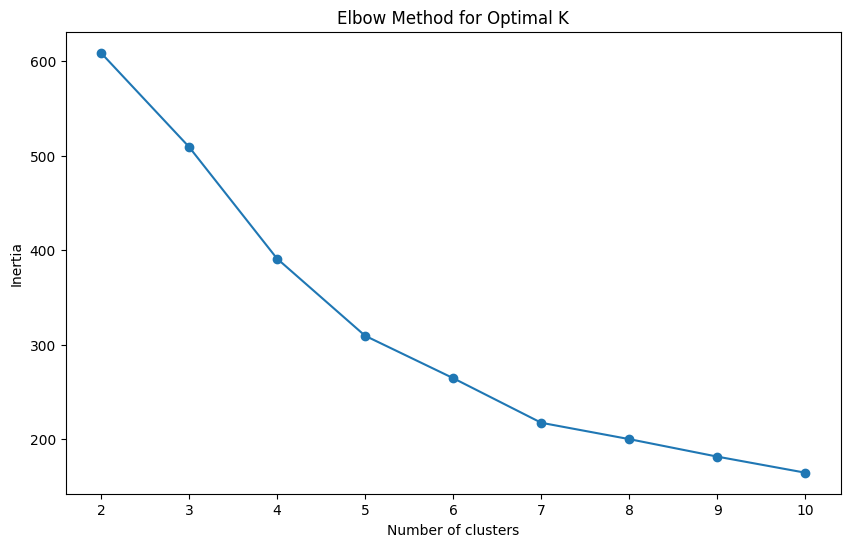

In [3]:
# 1. K-Means with Elbow method to find optimal K
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

The average silhouette score is: 0.427
The clustering shows a reasonable structure. 0


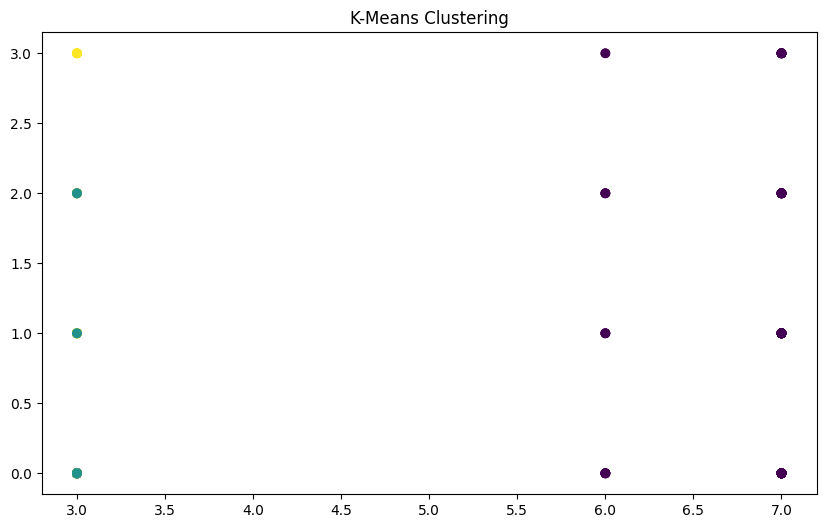

In [4]:
# Choose optimal K (3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"The average silhouette score is: {silhouette_avg:.3f}")

# Interpret the score:
if silhouette_avg > 0.5:
    print( "The clustering shows a strong structure. ")
elif silhouette_avg > 0.25:
    print( "The clustering shows a reasonable structure. 0")
else:
    print( "The clustering structure is weak and could be artificial.")

# Compare with actual labels
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

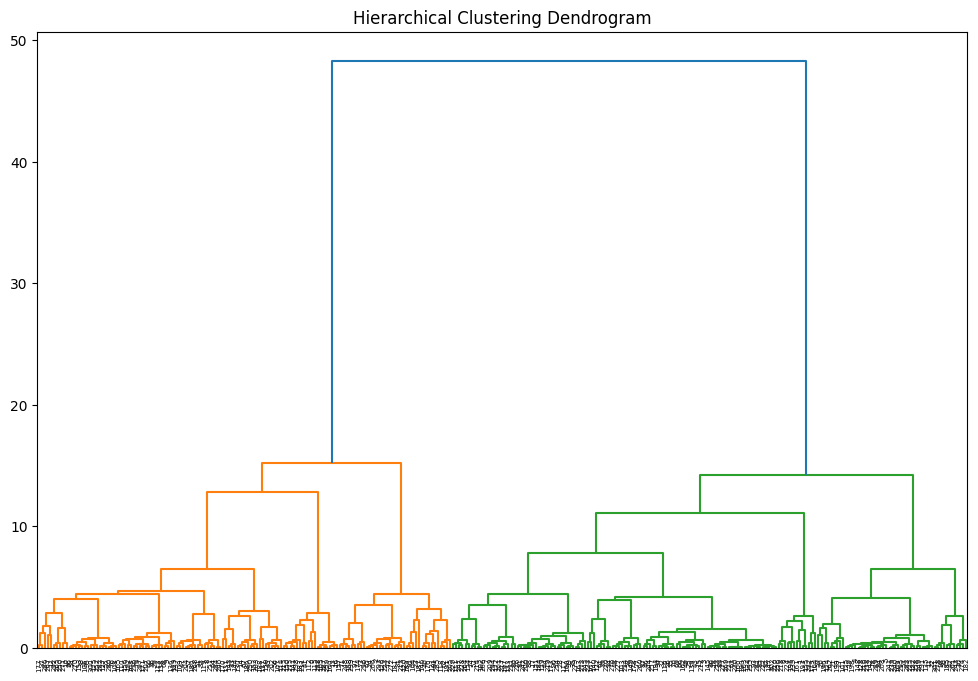

In [5]:
# 2. Hierarchical Clustering
linked = linkage(X, 'ward')

plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()